<a href="https://colab.research.google.com/github/JMFU/QuantEcon.py/blob/master/graficas2r2pq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving produccion-nacional-de-petroleo-y-gas-may2021.xlsx to produccion-nacional-de-petroleo-y-gas-may2021.xlsx


In [ ]:
df = pd.read_excel('produccion-nacional-de-petroleo-y-gas-may2021.xlsx', 
                                           sheet_name='Gas natural',
                                           skiprows=6,
                   names=['Fecha', 'Cuenca', 'Ubicación', 'Campo', 
                          'Operador', 'MMpcd', 'Nitrogeno'])
print(df.head())

       Fecha               Cuenca  ...     MMpcd Nitrogeno
0 1960-01-01     Tampico-Misantla  ...  1.230383       NaN
1 1960-01-01  Cuencas del Sureste  ...  2.060930       NaN
2 1960-01-01     Tampico-Misantla  ...  0.097871       NaN
3 1960-01-01             Veracruz  ...  0.466636       NaN
4 1960-01-01  Cuencas del Sureste  ...  0.765272       NaN

[5 rows x 7 columns]


In [ ]:
df.columns

Index(['Fecha', 'Cuenca', 'Ubicación', 'Campo', 'Operador', 'MMpcd',
       'Nitrogeno'],
      dtype='object')

In [ ]:
produc_otros_oper = df.groupby(['Operador', 'Fecha'])['MMpcd'].sum()

In [ ]:
produc_otros_oper = produc_otros_oper.reset_index(level=['Fecha', 'Operador' ])

In [ ]:
from datetime import timedelta as td
from datetime import datetime
import dateutil.parser
produc_otros_oper = produc_otros_oper.loc[produc_otros_oper.TimeStamp('2016-05-01'):]

AttributeError: ignored

In [ ]:
produc_otros_oper = produc_otros_oper.pivot(index='Fecha', columns='Operador', values='MMpcd').fillna(0)

In [ ]:
produc_otros_oper 

Operador,Bloque VC 01,CMM,Canamex Energy Holdings,Consorcio Petrolero 5M del Golfo,Deustche Erdoel México,Diarqco,Diavaz,Dunas Exploración y Producción,Eni México,GS Oil & Gas,Hokchi Energy,Iberoamericana de Hidrocarburos CQ,Jaguar Exploración y Producción,Oleum del Norte,Pantera Exploración y Producción,Pemex Exploración y Producción,Perseus,Petrofac México,Petrolera Cárdenas Mora,Renaissance Oil Corp,Servicios Múltiples de Burgos,Servicios de Extracción Petrolera Lifting,Strata,Tonalli Energía,Vista Oil & Gas Holding II
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,885.686730,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1960-02-01,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,898.246726,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1960-03-01,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.604860,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1960-04-01,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,886.623457,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1960-05-01,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,889.396153,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,0.065454,5.824638,0.0,9.875257,16.767992,0.0,5.819249,1.249876,17.502639,2.394263,0.780159,5.656579,0.519128,0.148113,9.000292,3559.780477,0.0,13.312773,11.804447,4.855079,98.894492,2.739344,3.854464,0.049594,0.037912
2021-02-01,0.044502,4.856451,0.0,9.454810,15.665417,0.0,5.092908,1.089044,13.052223,2.319225,0.709120,5.638407,0.409981,0.051739,9.573792,3601.839446,0.0,12.292396,11.721566,4.870347,96.635463,2.963592,3.662266,0.049594,0.034922
2021-03-01,0.064077,5.476071,0.0,10.215590,14.711976,0.0,5.054717,1.284678,19.972886,2.258669,0.776689,5.700558,0.613695,0.052670,8.634406,3639.147019,0.0,13.108140,12.303404,4.888897,93.952704,2.488022,3.481398,0.049594,0.029595


In [ ]:
produc_por_cuenca = df.groupby(['Fecha', 'Cuenca'])['MMpcd'].sum()
produc_por_cuenca

Fecha       Cuenca             
1960-01-01  Burgos                  308.354961
            Cuencas del Sureste     333.598065
            Tampico-Misantla        242.573640
            Veracruz                  1.160064
1960-02-01  Burgos                  322.044792
                                      ...     
2021-05-01  Burgos                  509.531495
            Cuencas del Sureste    2907.414405
            Sabinas                   4.659370
            Tampico-Misantla        109.298637
            Veracruz                311.691405
Name: MMpcd, Length: 4163, dtype: float64

In [ ]:
campos_por_cuenca = df.groupby(['Fecha', 'Cuenca'])['Campo'].count()
campos_por_cuenca

Fecha       Cuenca             
1960-01-01  Burgos                   9
            Cuencas del Sureste     21
            Tampico-Misantla        32
            Veracruz                 2
1960-02-01  Burgos                   9
                                  ... 
2021-05-01  Burgos                 121
            Cuencas del Sureste    140
            Sabinas                  4
            Tampico-Misantla        84
            Veracruz                20
Name: Campo, Length: 4163, dtype: int64

In [ ]:
campos_por_cuenca = campos_por_cuenca.reset_index(level=['Fecha', 'Cuenca' ])

In [ ]:
campos_por_cuenca

,Fecha,Cuenca,Campo
0,1960-01-01,Burgos,9
1,1960-01-01,Cuencas del Sureste,21
2,1960-01-01,Tampico-Misantla,32
3,1960-01-01,Veracruz,2
4,1960-02-01,Burgos,9
...,...,...,...
4158,2021-05-01,Burgos,121
4159,2021-05-01,Cuencas del Sureste,140
4160,2021-05-01,Sabinas,4
4161,2021-05-01,Tampico-Misantla,84


In [ ]:
#campos_por_cuenca = campos_por_cuenca.reset_index(level=['Fecha', 'Cuenca'])
campos_por_cuenca = campos_por_cuenca.pivot(index='Fecha', columns='Cuenca', values='Campo').fillna(0)

In [ ]:
campos_por_cuenca

Cuenca,Burgos,Cinturón Plegado de Chiapas,Cuencas del Sureste,Plataforma Burro-Picachos,Plataforma de Yucatán,Sabinas,Tampico-Misantla,Veracruz
Fecha,,,,,,,,
1960-01-01,9.0,0.0,21.0,0.0,0.0,0.0,32.0,2.0
1960-02-01,9.0,0.0,22.0,0.0,0.0,0.0,32.0,1.0
1960-03-01,10.0,0.0,23.0,0.0,0.0,0.0,33.0,1.0
1960-04-01,10.0,0.0,23.0,0.0,1.0,0.0,33.0,1.0
1960-05-01,10.0,0.0,23.0,0.0,1.0,0.0,32.0,1.0
...,...,...,...,...,...,...,...,...
2021-01-01,112.0,1.0,137.0,0.0,0.0,4.0,84.0,20.0
2021-02-01,119.0,1.0,136.0,0.0,0.0,4.0,83.0,20.0
2021-03-01,120.0,0.0,138.0,0.0,0.0,4.0,81.0,20.0


In [ ]:
produc_por_cuenca = produc_por_cuenca.reset_index(level=['Fecha','Cuenca'])

In [ ]:
produc_por_cuenca = produc_por_cuenca.pivot(index='Fecha', columns='Cuenca', values='MMpcd').fillna(0)

In [ ]:
produc_por_cuenca

Cuenca,Burgos,Cinturón Plegado de Chiapas,Cuencas del Sureste,Plataforma Burro-Picachos,Plataforma de Yucatán,Sabinas,Tampico-Misantla,Veracruz
Fecha,,,,,,,,
1960-01-01,308.354961,0.000000,333.598065,0.0,0.000000,0.000000,242.573640,1.160064
1960-02-01,322.044792,0.000000,340.106612,0.0,0.000000,0.000000,235.654219,0.441103
1960-03-01,325.609422,0.000000,335.819021,0.0,0.000000,0.000000,238.745411,0.431006
1960-04-01,321.720880,0.000000,336.851262,0.0,0.035689,0.000000,227.598569,0.417057
1960-05-01,330.076676,0.000000,319.975141,0.0,0.091614,0.000000,238.880339,0.372383
...,...,...,...,...,...,...,...,...
2021-01-01,522.782320,0.844934,2807.880621,0.0,0.000000,5.217876,116.066691,318.139780
2021-02-01,521.676538,0.155655,2831.759167,0.0,0.000000,5.222477,112.407230,330.806145
2021-03-01,535.631958,0.000000,2869.147701,0.0,0.000000,5.110917,111.758106,322.616773


In [ ]:
produc_por_cuenca.columns

Index(['Burgos', 'Cinturón Plegado de Chiapas', 'Cuencas del Sureste',
       'Plataforma Burro-Picachos', 'Plataforma de Yucatán', 'Sabinas',
       'Tampico-Misantla', 'Veracruz'],
      dtype='object', name='Cuenca')

In [ ]:
# Create an array with the colors you want to use
colors = ["#13322B", '#285C4D', '#B38E5D', '#D4C19C']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
# Use the parameter palette and use your own palette across all your
# plots
ax = sns.scatterplot(x='day', y='miles_walked', data=dataset, hue='day_category', palette=customPalette)
# Customize the axes and title
ax.set_title("Miles walked")
ax.set_xlabel("day")
ax.set_ylabel("total miles")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

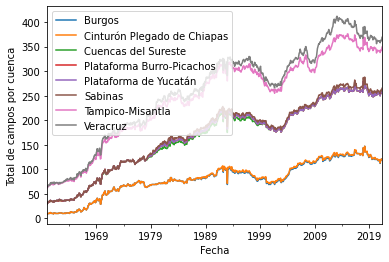

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
campos_por_cuenca[['Burgos', 'Cinturón Plegado de Chiapas', 'Cuencas del Sureste','Plataforma Burro-Picachos', 'Plataforma de Yucatán', 'Sabinas','Tampico-Misantla', 'Veracruz']].plot(stacked=True)
plt.xlabel('Fecha')
plt.ylabel('Total de campos por cuenca')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

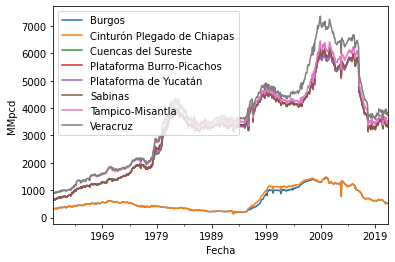

In [ ]:
plt.figure()
produc_por_cuenca[['Burgos', 'Cinturón Plegado de Chiapas', 'Cuencas del Sureste','Plataforma Burro-Picachos', 'Plataforma de Yucatán', 'Sabinas','Tampico-Misantla', 'Veracruz']].plot(stacked=True)
plt.xlabel('Fecha')
plt.ylabel('MMpcd')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

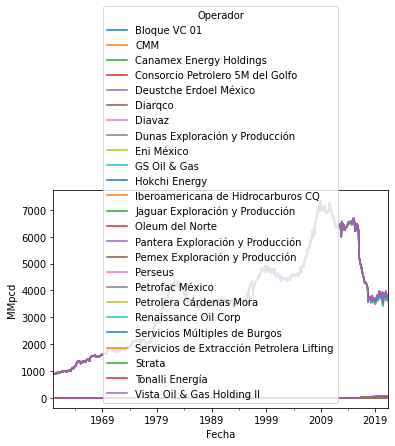

In [ ]:
plt.figure()
produc_otros_oper[['Bloque VC 01', 'CMM', 'Canamex Energy Holdings',
       'Consorcio Petrolero 5M del Golfo', 'Deustche Erdoel México', 'Diarqco',
       'Diavaz', 'Dunas Exploración y Producción', 'Eni México',
       'GS Oil & Gas', 'Hokchi Energy', 'Iberoamericana de Hidrocarburos CQ',
       'Jaguar Exploración y Producción', 'Oleum del Norte',
       'Pantera Exploración y Producción', 'Pemex Exploración y Producción',
       'Perseus', 'Petrofac México', 'Petrolera Cárdenas Mora',
       'Renaissance Oil Corp', 'Servicios Múltiples de Burgos',
       'Servicios de Extracción Petrolera Lifting', 'Strata',
       'Tonalli Energía', 'Vista Oil & Gas Holding II']].plot(stacked=True)
plt.xlabel('Fecha')
plt.ylabel('MMpcd')
#plt.legend()
plt.show()

In [ ]:
type(produc_otros_oper)

pandas.core.frame.DataFrame

<Figure size 432x288 with 0 Axes>

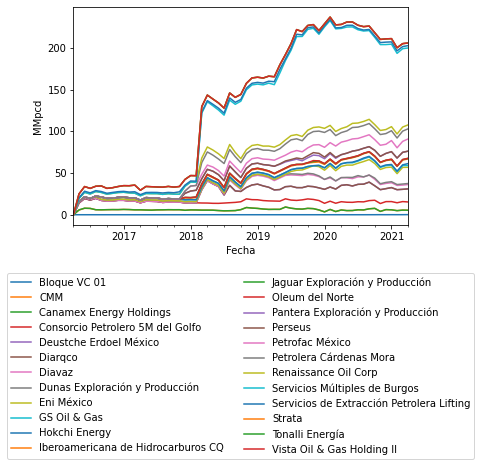

In [55]:
plt.figure()
import numpy as np
produc_otros_oper_dated = produc_otros_oper['2016-04-01':]
produc_otros_oper_dated[['Bloque VC 01', 'CMM', 'Canamex Energy Holdings',
       'Consorcio Petrolero 5M del Golfo', 'Deustche Erdoel México', 'Diarqco',
       'Diavaz', 'Dunas Exploración y Producción', 'Eni México',
       'GS Oil & Gas', 'Hokchi Energy', 'Iberoamericana de Hidrocarburos CQ',
       'Jaguar Exploración y Producción', 'Oleum del Norte',
       'Pantera Exploración y Producción','Perseus', 'Petrofac México', 'Petrolera Cárdenas Mora',
       'Renaissance Oil Corp', 'Servicios Múltiples de Burgos',
       'Servicios de Extracción Petrolera Lifting', 'Strata',
       'Tonalli Energía', 'Vista Oil & Gas Holding II']].plot(stacked=True)
plt.xlabel('Fecha')
plt.ylabel('MMpcd')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-1.1), ncol=2)
plt.show()

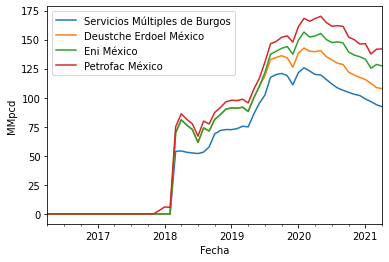

In [37]:
produc_otros_oper_dated[['Servicios Múltiples de Burgos', 'Deustche Erdoel México', 'Eni México', 'Petrofac México']].plot(stacked=True)
plt.xlabel('Fecha')
plt.ylabel('MMpcd')
plt.legend()
plt.show()